In [1]:
import pandas as pd

red_url = 'https://raw.githubusercontent.com/PinkWink/ML_tutorial/master/dataset/winequality-red.csv'
white_url = 'https://raw.githubusercontent.com/PinkWink/ML_tutorial/master/dataset/winequality-white.csv'

red_wine = pd.read_csv(red_url, sep=';')
white_wine = pd.read_csv(white_url, sep=';')

red_wine['color'] = 1.
white_wine['color'] = 0.

wine = pd.concat([red_wine, white_wine])
wine['taste'] = [1. if grade>5 else 0. for grade in wine['quality']]

X = wine.drop(['taste', 'quality'], axis=1)
y = wine['taste']

##### 데이터 분리

In [2]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

##### Logistic regression

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

lr = LogisticRegression(solver='liblinear', random_state=13)
lr.fit(X_train, y_train)

y_pred_tr = lr.predict(X_train)
y_pred_test = lr.predict(X_test)

print('Train Acc : ', accuracy_score(y_train, y_pred_tr))
print('Test Acc : ', accuracy_score(y_test, y_pred_test))

Train Acc :  0.7425437752549547
Test Acc :  0.7438461538461538


##### classification_report

In [5]:
from sklearn.metrics import classification_report

print(classification_report(y_test, lr.predict(X_test)))

              precision    recall  f1-score   support

         0.0       0.68      0.58      0.62       477
         1.0       0.77      0.84      0.81       823

    accuracy                           0.74      1300
   macro avg       0.73      0.71      0.71      1300
weighted avg       0.74      0.74      0.74      1300



##### confusion_matrix

In [6]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, lr.predict(X_test))

array([[275, 202],
       [131, 692]], dtype=int64)

##### precision_recall curve

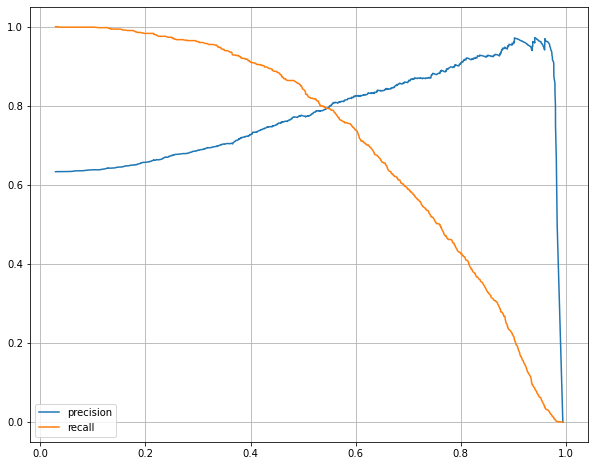

In [8]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve
%matplotlib inline

plt.figure(figsize=(10, 8))
pred = lr.predict_proba(X_test)[:, 1]
precisions, recalls, thresholds = precision_recall_curve(y_test, pred)
plt.plot(thresholds, precisions[:len(thresholds)], label='precision')
plt.plot(thresholds, recalls[:len(thresholds)], label='recall')
plt.grid()
plt.legend()
plt.show()

##### threshold = 0.5

In [9]:
pred_proba = lr.predict_proba(X_test)
pred_proba[:3]

array([[0.40507838, 0.59492162],
       [0.50967658, 0.49032342],
       [0.10212995, 0.89787005]])

In [10]:
pred_proba

array([[0.40507838, 0.59492162],
       [0.50967658, 0.49032342],
       [0.10212995, 0.89787005],
       ...,
       [0.22538128, 0.77461872],
       [0.67364548, 0.32635452],
       [0.31440844, 0.68559156]])

In [11]:
y_pred_test

array([1., 0., 1., ..., 1., 0., 1.])

In [13]:
y_pred_test.reshape(-1, 1).shape

(1300, 1)

In [16]:
import numpy as np

np.concatenate([pred_proba, y_pred_test.reshape(-1, 1)], axis=1)

array([[0.40507838, 0.59492162, 1.        ],
       [0.50967658, 0.49032342, 0.        ],
       [0.10212995, 0.89787005, 1.        ],
       ...,
       [0.22538128, 0.77461872, 1.        ],
       [0.67364548, 0.32635452, 0.        ],
       [0.31440844, 0.68559156, 1.        ]])

##### threshold 바꿔보기 - Binarizer

In [17]:
from sklearn.preprocessing import Binarizer

binarizer = Binarizer(threshold=0.5).fit(pred_proba)
pred_bin = binarizer.transform(pred_proba)[:, 1]
pred_bin

array([1., 0., 1., ..., 1., 0., 1.])